In [4]:

# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

/usr/local/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [5]:
theta_0 = 0
calibrate_gyroscope = 0

In [6]:
def subtract_from_prev_val(df, col, init_val=0):
    return (df[col] - df.shift()[col])
    
def integrate_col(df, fxdx_col, dx_col, init_val):
    """
    Numeric integration from a panda data frame.
    Uses simply box method
    """
    fxdx_l = df[fxdx_col].tolist()
    dx_l = df[dx_col].tolist()
    prev_val = init_val
    y = [init_val]*len(df)
    for i in xrange(len(df)):
        y_val = prev_val + float(dx_l[i]) * fxdx_l[i]
        y[i] = y_val
        prev_val = y_val
    return np.array(y)

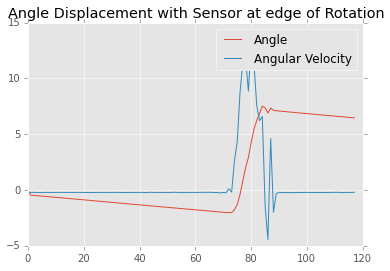

In [15]:
sensor_conv = 131.0
# wheel_rad = 0.110
wheel_rad = 1
df_edge = pd.read_csv('data/edge_test_00.csv')
df_edge['gx'] = df_edge['gx'] / (sensor_conv * wheel_rad);
df_edge['time_diff'] = subtract_from_prev_val(df_edge, 'timestamp').fillna(0)/1000
pos = integrate_col(df_edge, 'gx', 'time_diff', 0)
plt.plot(integrate_col(df_edge, 'gx', 'time_diff', 0), label='Angle')
plt.plot(df_edge['gx'], label='Angular Velocity')
plt.title('Angle Displacement with Sensor at edge of Rotation')
plt.legend()

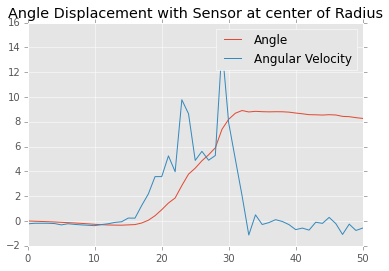

In [16]:
dfsensor_conv = 131.0
# wheel_rad = 0.110
wheel_rad = 1
df_cen = pd.read_csv('data/center_test_00.csv')
df_cen['gx'] = df_cen['gx'] / (sensor_conv * wheel_rad);
df_cen['time_diff'] = subtract_from_prev_val(df_cen, 'timestamp').fillna(0)/1000
pos = integrate_col(df_cen, 'gx', 'time_diff', 0)
plt.plot(integrate_col(df_cen, 'gx', 'time_diff', 0), label='Angle')
plt.plot(df_cen['gx'], label='Angular Velocity')
plt.title('Angle Displacement with Sensor at center of Radius')
plt.legend()

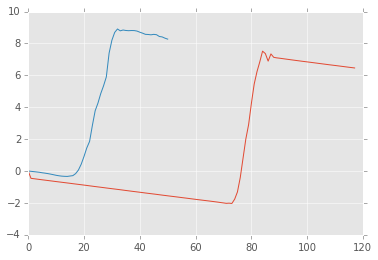

In [18]:
plt.plot(integrate_col(df_edge, 'gx', 'time_diff', 0), label='edge')
plt.plot(integrate_col(df_cen, 'gx', 'time_diff', 0), label='center')